<a href="https://colab.research.google.com/github/MikolajWasowski/machine-learning-bootcamp/blob/main/supervised/05_case_studies/01_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:

raw_digits = datasets.load_digits()
digits = raw_digits.copy()
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
images = digits['images']
targets = digits['target']
print(f'images shape: {images.shape}')
print(f'targets shape: {targets.shape}')

images shape: (1797, 8, 8)
targets shape: (1797,)


In [4]:

images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

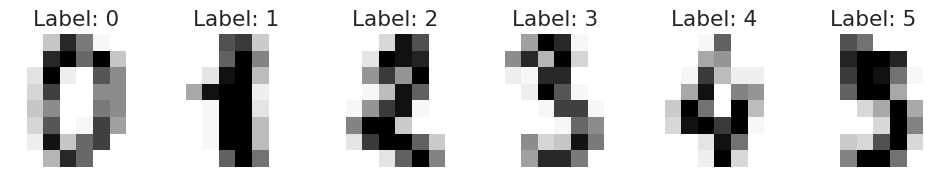

In [5]:

plt.figure(figsize=(12, 10))
for index, (image, target) in enumerate(list(zip(images, targets))[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f'Label: {target}')

In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')




X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [15]:
X_train[0]

array([ 0.,  1., 13., 14., 16., 14.,  3.,  0.,  0.,  4., 14.,  8.,  7.,
        3.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
       16., 15., 11.,  5.,  0.,  0.,  0.,  2.,  7.,  7., 10., 16.,  0.,
        0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  7.,  5.,
       13., 11.,  0.,  0.,  0.,  0., 15., 16., 10.,  1.,  0.,  0.])

In [16]:
y_train[0]


5

In [17]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)


SVC(gamma=0.001, kernel='linear')

In [18]:
classifier.score(X_test, y_test)

0.9822222222222222

In [19]:

classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)


SVC(gamma=0.001)

In [20]:
classifier.score(X_test, y_test)

0.9866666666666667

In [21]:
y_pred = classifier.predict(X_test)
y_pred

array([9, 8, 1, 4, 7, 9, 1, 8, 5, 9, 9, 2, 0, 6, 3, 4, 5, 8, 6, 0, 9, 3,
       7, 5, 5, 8, 3, 7, 2, 4, 7, 8, 2, 0, 7, 1, 0, 8, 3, 8, 4, 7, 4, 3,
       5, 6, 5, 8, 3, 2, 6, 8, 1, 8, 6, 2, 3, 1, 0, 5, 5, 5, 1, 3, 6, 0,
       7, 8, 4, 9, 5, 4, 6, 4, 6, 6, 7, 9, 9, 2, 0, 3, 0, 4, 1, 4, 3, 6,
       4, 7, 6, 7, 2, 8, 2, 7, 6, 7, 3, 4, 4, 7, 3, 7, 0, 0, 9, 0, 9, 2,
       0, 2, 0, 0, 8, 3, 9, 3, 1, 0, 4, 2, 3, 6, 9, 3, 5, 5, 4, 9, 7, 6,
       9, 2, 9, 5, 1, 9, 0, 4, 9, 2, 8, 0, 3, 2, 2, 2, 5, 1, 0, 7, 4, 1,
       4, 7, 6, 5, 7, 6, 3, 1, 1, 0, 6, 4, 1, 9, 1, 5, 5, 3, 6, 2, 6, 9,
       6, 8, 2, 3, 8, 1, 1, 6, 5, 9, 1, 5, 2, 9, 5, 4, 5, 6, 0, 1, 3, 2,
       1, 7, 3, 9, 7, 7, 8, 4, 3, 6, 0, 8, 0, 0, 1, 7, 1, 2, 1, 2, 5, 6,
       8, 2, 4, 4, 1, 0, 7, 5, 7, 8, 5, 0, 6, 9, 2, 6, 2, 6, 5, 4, 0, 6,
       8, 9, 7, 6, 0, 5, 8, 0, 7, 9, 8, 3, 6, 6, 0, 7, 0, 2, 2, 1, 9, 0,
       4, 5, 6, 8, 2, 0, 1, 0, 7, 0, 6, 5, 4, 0, 1, 0, 4, 4, 8, 5, 2, 0,
       0, 2, 9, 0, 8, 8, 3, 8, 6, 8, 0, 0, 0, 4, 9,

In [22]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        36
           2       0.98      1.00      0.99        50
           3       1.00      0.96      0.98        45
           4       1.00      0.98      0.99        48
           5       0.98      1.00      0.99        41
           6       1.00      1.00      1.00        47
           7       0.97      1.00      0.99        39
           8       0.98      0.98      0.98        41
           9       1.00      0.96      0.98        49

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [23]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 47]])

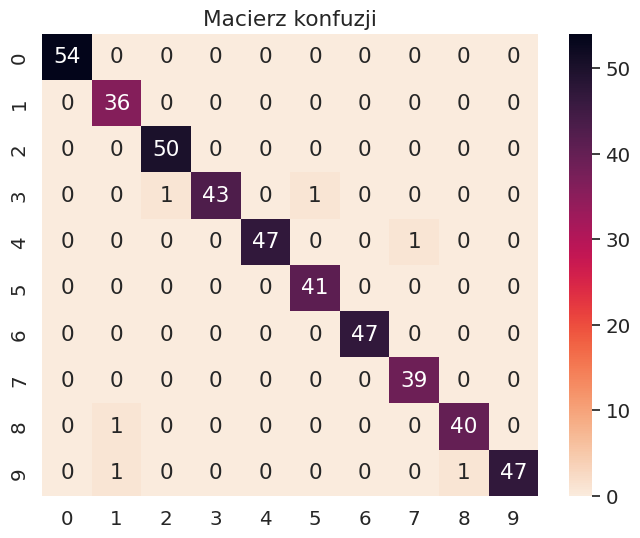

In [24]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [25]:

columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [26]:

results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,9,9
1,8,8
2,1,1
3,4,4
4,7,7
5,9,9
6,1,1
7,8,8
8,5,5
9,9,9


In [27]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs


[23, 216, 257, 331, 341, 441]

In [30]:
results.loc[errors_idxs, :]

,y_pred,y_test
23,5,3
216,1,9
257,7,4
331,8,9
341,2,3
441,1,8
